##### GLDADec (Our Proposed) deconvolution on GSE237801-ANIT
- We downloaded the processed data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE237801.
- alpha-naphthyl isothiocyanate (ANIT) induced liver injury models.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = '/workspace/github/GLDADec' # cloning repository
import sys
sys.path.append(BASE_DIR)

from run import pipeline

***
#### Load data

In [2]:
raw_df = pd.read_csv(BASE_DIR+'/data/GSE237801/mouse_dili_expression.csv',index_col=0)
marker_dic = pd.read_pickle(BASE_DIR+'/data/marker/mouse_liver_CellMarker.pkl')
random_sets = pd.read_pickle(BASE_DIR+'/data/random_info/100_random_sets.pkl')
target_facs = pd.read_csv(BASE_DIR+'/data/GSE237801/mouse_dili_facs.csv',index_col=0)/100

***
#### Conduct GLDADec
- We added 1000 genes with large coefficients of variation between samples.
- To highlight the difference of trafficking of immune cells due to perturbation, a sample-wide minmax correction was performed as a preprocessing step.
- The cell types to be evaluated are as follows:
    1. Neutrophils
    2. Monocytes
    3. NK cells
    4. Kupffer cells

***
##### 1. Without any additional topic
- add_topic = 0

  0%|          | 0/10 [00:00<?, ?it/s]

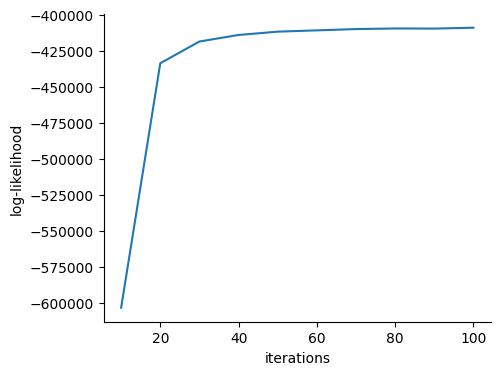

cells in res : ['Neutrophil', 'Monocyte', 'Natural killer cell', 'Kupffer cell']
cells in ref : ['Neutrophil', 'Monocyte', 'NK', 'Kupffer']


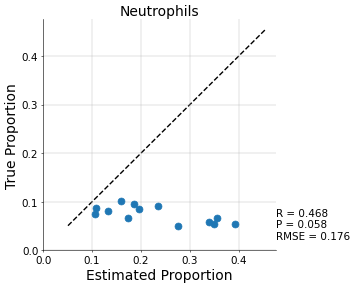

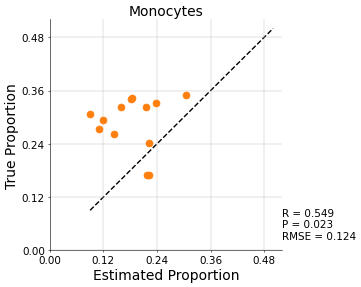

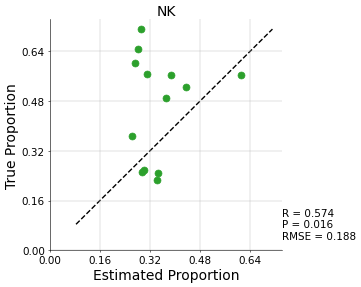

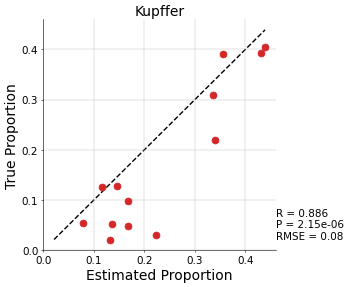

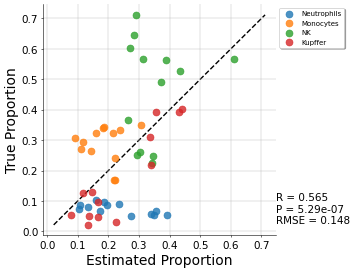

{'Kupffer': [('R', 0.8865), ('P', '2.15e-06'), ('RMSE', 0.0802)],
 'Monocytes': [('R', 0.5488), ('P', 0.023), ('RMSE', 0.1244)],
 'NK': [('R', 0.5739), ('P', 0.016), ('RMSE', 0.1877)],
 'Neutrophils': [('R', 0.4678), ('P', 0.058), ('RMSE', 0.1763)]}
0.5646


In [3]:
# conduct deconv
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=['Ctrl', 'ANIT'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=1000)
pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
pp.deconv(n=10,add_topic=0,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=True,var_plot=False)

# evaluate
pp.evaluate(facs_df=target_facs,deconv_norm_range=['Neutrophil','Monocyte','Natural killer cell','Kupffer cell'],
            facs_norm_range=['Neutrophil','Monocyte','NK','Kupffer'],
            res_names=[['Neutrophil'],['Monocyte'],['Natural killer cell'],['Kupffer cell']],
            ref_names=[['Neutrophil'],['Monocyte'],['NK'],['Kupffer']],
            title_list = ['Neutrophils','Monocytes','NK','Kupffer'],
            target_samples = ['Ctrl', 'APAP'],
            figsize=(6,6),dpi=50,plot_size=100,multi=False,overlap=True)
print(pp.total_cor)

In [4]:
res = pp.merge_total_res[0]
display(res)

,Hepatocyte,Dendritic cell,Hepatoblast,Stem cell,Kupffer cell,Natural killer cell,B cell,Monocyte,Regulatory T (Treg) cell,Hepatic stellate cell,...,Erythroblast,Artery cell,Early erythrocyte,Portal vein cell,Fibroblast,Effector memory T cell,Natural killer T(NKT) cell,Liver sinusoid endothelial cell(LSECs),Macrovascular endothelial cell (MaVECs),Vascular smooth muscle cell(VSMC)
ANIT_1,0.055554,0.027364,0.000003,0.019073,0.031510,0.034826,0.016033,0.069373,0.022113,0.023495,...,0.000003,0.030128,0.016309,0.046987,0.014374,0.027088,0.032339,0.008847,0.066057,0.016862
ANIT_2,0.068766,0.034835,0.000604,0.021923,0.023425,0.027929,0.000003,0.148940,0.000003,0.035135,...,0.000003,0.073871,0.007510,0.049248,0.015918,0.000003,0.039940,0.049549,0.056155,0.006009
ANIT_3,0.041688,0.011255,0.001026,0.013812,0.015858,0.019694,0.000514,0.167255,0.000514,0.009721,...,0.000003,0.133498,0.000514,0.042711,0.005885,0.003327,0.109458,0.006907,0.065983,0.003583
ANIT_4,0.061810,0.029919,0.018348,0.013832,0.050521,0.024556,0.010727,0.143938,0.003672,0.038103,...,0.001132,0.032741,0.000003,0.049110,0.025121,0.002543,0.018348,0.025685,0.045159,0.007058
Ctrl_1,0.070510,0.078377,0.000003,0.048368,0.006413,0.031760,0.106930,0.018067,0.000003,0.075172,...,0.014279,0.008161,0.077503,0.060896,0.054195,0.012240,0.009909,0.061478,0.076046,0.026516
Ctrl_10,0.103591,0.156704,0.010230,0.049818,0.057405,0.049488,0.085116,0.028704,0.035632,0.049158,...,0.001983,0.000003,0.030024,0.000003,0.059385,0.005941,0.025735,0.025075,0.007261,0.003302
Ctrl_12,0.104593,0.161907,0.004213,0.070269,0.073507,0.050841,0.079336,0.023965,0.011336,0.059584,...,0.000003,0.000651,0.034974,0.001298,0.035622,0.014251,0.019755,0.050517,0.002918,0.002918
Ctrl_15,0.082024,0.105363,0.001670,0.073021,0.025676,0.054683,0.060352,0.027010,0.032678,0.103362,...,0.025343,0.003671,0.039680,0.007672,0.057017,0.037679,0.029010,0.020675,0.005338,0.016674
Ctrl_16,0.114490,0.094739,0.012055,0.060929,0.009376,0.041848,0.046200,0.021093,0.097082,0.088713,...,0.000003,0.034148,0.011050,0.006364,0.073649,0.049547,0.043187,0.004355,0.010046,0.009376
Ctrl_17,0.079166,0.092792,0.001301,0.046398,0.021416,0.108365,0.098957,0.036016,0.002274,0.042180,...,0.150542,0.003896,0.030176,0.001301,0.040882,0.005194,0.013954,0.001625,0.000652,0.006816


***
##### 2. With optimal number of additional topics

  0%|          | 0/10 [00:00<?, ?it/s]

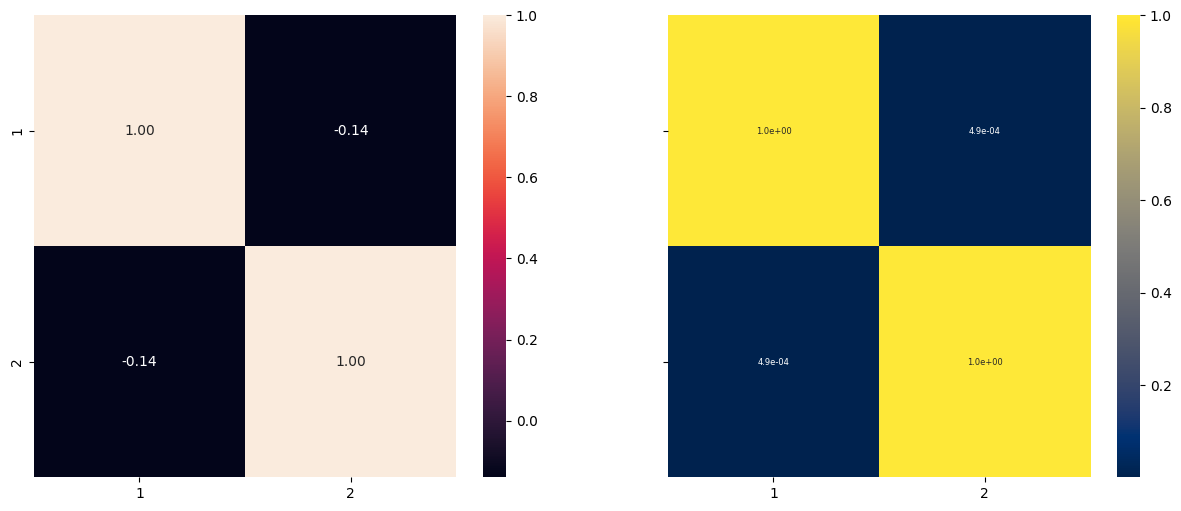

  0%|          | 0/10 [00:00<?, ?it/s]

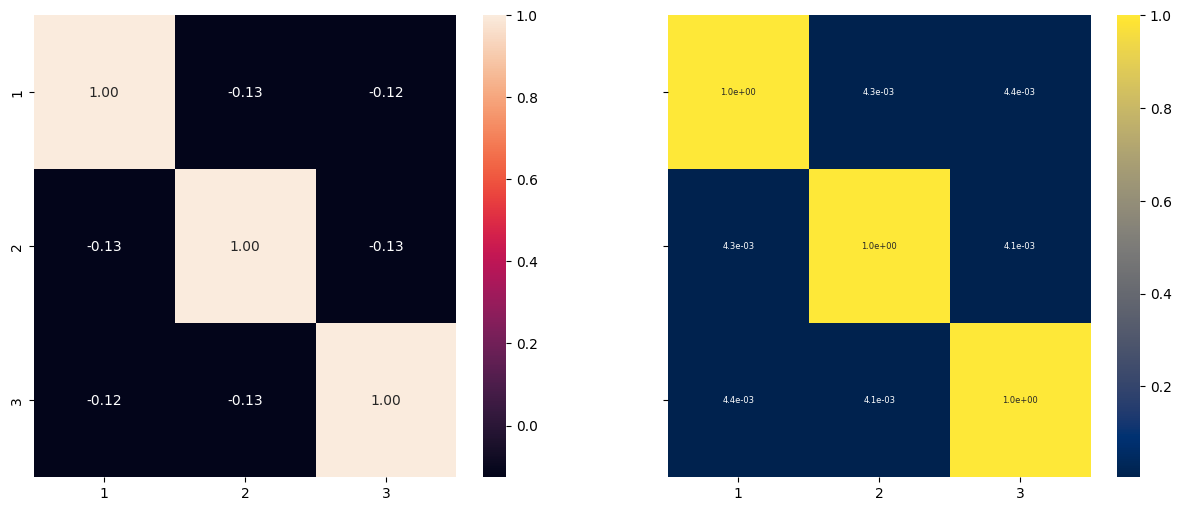

  0%|          | 0/10 [00:00<?, ?it/s]

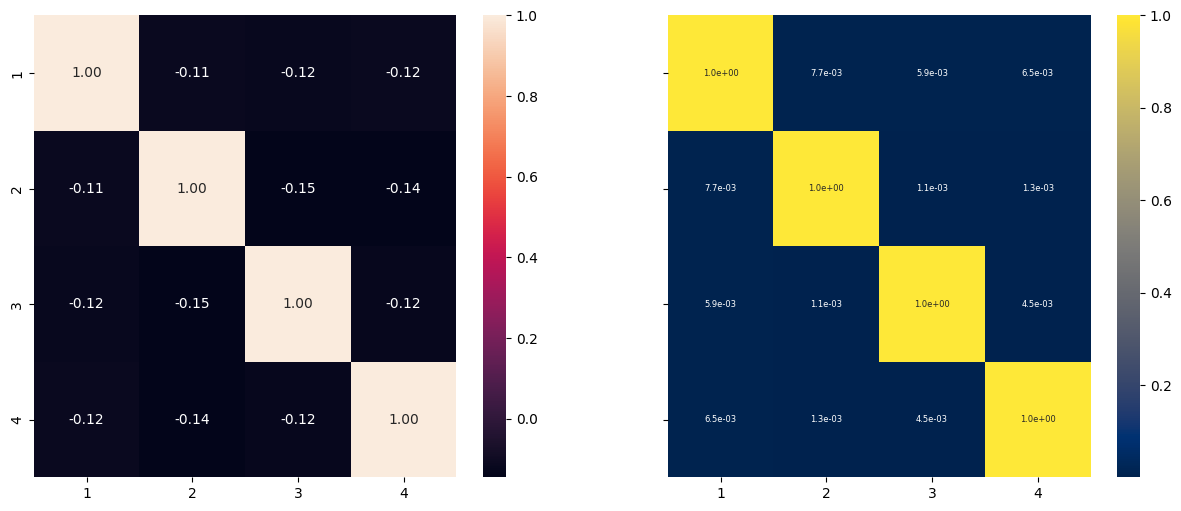

[[True, False], [True, False], [True, False]]
[8, 9, 4]


In [5]:
# detect optimal empty topic number
bool_res = []
p_res = []
for add_topic in range(2,5):
    pp = pipeline.Pipeline(verbose=False)
    pp.from_predata(raw_df,target_samples=['Ctrl', 'ANIT'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
    pp.gene_selection(method='CV',outlier=True,topn=1000)
    pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
    pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
    pp.deconv(n=10,add_topic=add_topic,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=False,var_plot=False)

    overlap,pflag,min_p_list,max_p_list = pp.add_profile_eval(add_topic=add_topic)
    bool_res.append([overlap,pflag])
    p_res.append(max_p_list)
print(bool_res)

sig_number = []
for t in p_res:
    n = sum([i<0.05 for i in t])
    sig_number.append(n)
print(sig_number)

When three topics were added, the topics were independent with an ensemble factor of 9/10; when four were added, the number decreased to 4/10. Based on these results, we can conclude that three additional topics are optimal.


  0%|          | 0/10 [00:00<?, ?it/s]

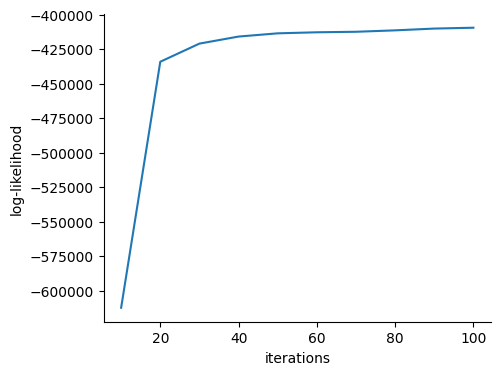

cells in res : ['Neutrophil', 'Monocyte', 'Natural killer cell', 'Kupffer cell']
cells in ref : ['Neutrophil', 'Monocyte', 'NK', 'Kupffer']


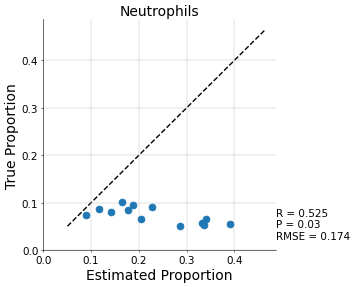

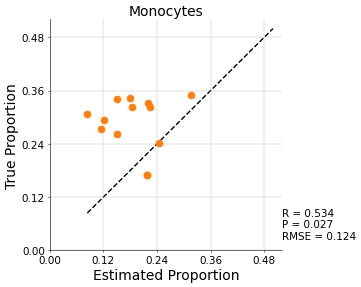

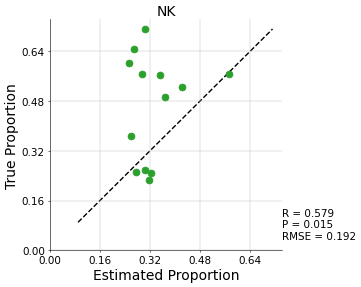

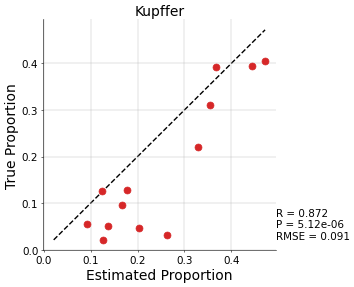

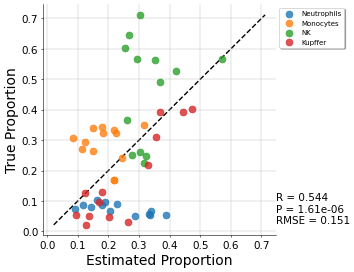

{'Kupffer': [('R', 0.8718), ('P', '5.12e-06'), ('RMSE', 0.0912)],
 'Monocytes': [('R', 0.5342), ('P', 0.027), ('RMSE', 0.1237)],
 'NK': [('R', 0.5794), ('P', 0.015), ('RMSE', 0.192)],
 'Neutrophils': [('R', 0.5253), ('P', 0.03), ('RMSE', 0.1743)]}
0.5442


In [6]:
# single run and eval
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=['Ctrl', 'ANIT'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=1000)
pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
pp.deconv(n=10,add_topic=3,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=True,var_plot=False) # with the optimized number of additional topics

# evaluate
pp.evaluate(facs_df=target_facs,deconv_norm_range=['Neutrophil','Monocyte','Natural killer cell','Kupffer cell'],
            facs_norm_range=['Neutrophil','Monocyte','NK','Kupffer'],
            res_names=[['Neutrophil'],['Monocyte'],['Natural killer cell'],['Kupffer cell']],
            ref_names=[['Neutrophil'],['Monocyte'],['NK'],['Kupffer']],
            title_list = ['Neutrophils','Monocytes','NK','Kupffer'],
            target_samples = ['Ctrl', 'APAP'],
            figsize=(6,6),dpi=50,plot_size=100,multi=False,overlap=True)
print(pp.total_cor)